# Notebook for Cut Face Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
from scipy.stats import norm

import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm
import math as math

%config InlineBackend.figure_format = 'retina'

In [2]:
viridis = cm.get_cmap('viridis', 10)

## import specimen-level data and merge grain size, strat height, and rip-up clasts data

In [4]:
Cutface_lat = 47.73055
Cutface_lon = -90.44128

Cutface_specimens = pd.read_csv('../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

strat_heights=pd.read_csv('../data/specimen_strat_height_new.csv',header=0)
cf_grain_sizes=pd.read_csv('../data/Pmag/cf_specimen_lithologies.csv')

Cutface_specimens=pd.merge(Cutface_specimens, cf_grain_sizes[['specimen', 'primary_grain_size','rip_ups']], on='specimen')
Cutface_specimens=pd.merge(Cutface_specimens, strat_heights, on='specimen')
Cutface_specimens.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,geologic_classes,geologic_types,lithologies,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,primary_grain_size,rip_ups,strat_level
0,CF-100a,NaN,CF-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedimentary,Sediment Layer,Siltstone:Sandstone,NaN,NaN,NaN,James Pierce,NaN,NaN,NaN,This study,LP-NOMAG,NaN,NaN,NaN,1,n,47.0
1,CF-100a,CF-100a_LP-DIR-T,CF-100,NaN,ht,292.9,26.0,2.0,9.0,0.0,16.4,10.0,Sedimentary,Sediment Layer,Siltstone:Sandstone,953.0,923.0,K,NaN,hargrave 2021-02-11 20:25:12,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,1,n,47.0
2,CF-100a,CF-100a_LP-DIR-T,CF-100,NaN,mt,281.0,41.6,2.0,10.0,0.0,8.1,4.5,Sedimentary,Sediment Layer,Siltstone:Sandstone,873.0,673.0,K,NaN,hargrave 2021-02-11 20:25:12,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,1,n,47.0
3,CF-100a,CF-100a_LP-DIR-T,CF-100,NaN,ht,288.4,31.6,2.0,9.0,100.0,16.4,10.0,Sedimentary,Sediment Layer,Siltstone:Sandstone,953.0,923.0,K,NaN,hargrave 2021-02-11 20:25:12,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,1,n,47.0
4,CF-100a,CF-100a_LP-DIR-T,CF-100,NaN,mt,272.2,45.1,2.0,10.0,100.0,8.1,4.5,Sedimentary,Sediment Layer,Siltstone:Sandstone,873.0,673.0,K,NaN,hargrave 2021-02-11 20:25:12,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,1,n,47.0


## Plot paleomagnetic directions

In [5]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [6]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_lt

{'dec': 359.3140071973992,
 'inc': 67.19770761735734,
 'n': 109,
 'r': 106.65359727244838,
 'k': 46.02790421774432,
 'alpha95': 2.0157272974389002,
 'csd': 11.93917776476927}

In [7]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 286.49699313337345,
 'inc': 42.003560540334476,
 'n': 167,
 'r': 163.55867702232504,
 'k': 48.23726255190197,
 'alpha95': 1.5861242493209464,
 'csd': 11.662554654251615}

In [8]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 286.57662835036626,
 'inc': 29.430252935780295,
 'n': 157,
 'r': 152.63958083558612,
 'k': 35.77637702199419,
 'alpha95': 1.9070660543868,
 'csd': 13.542125665843008}

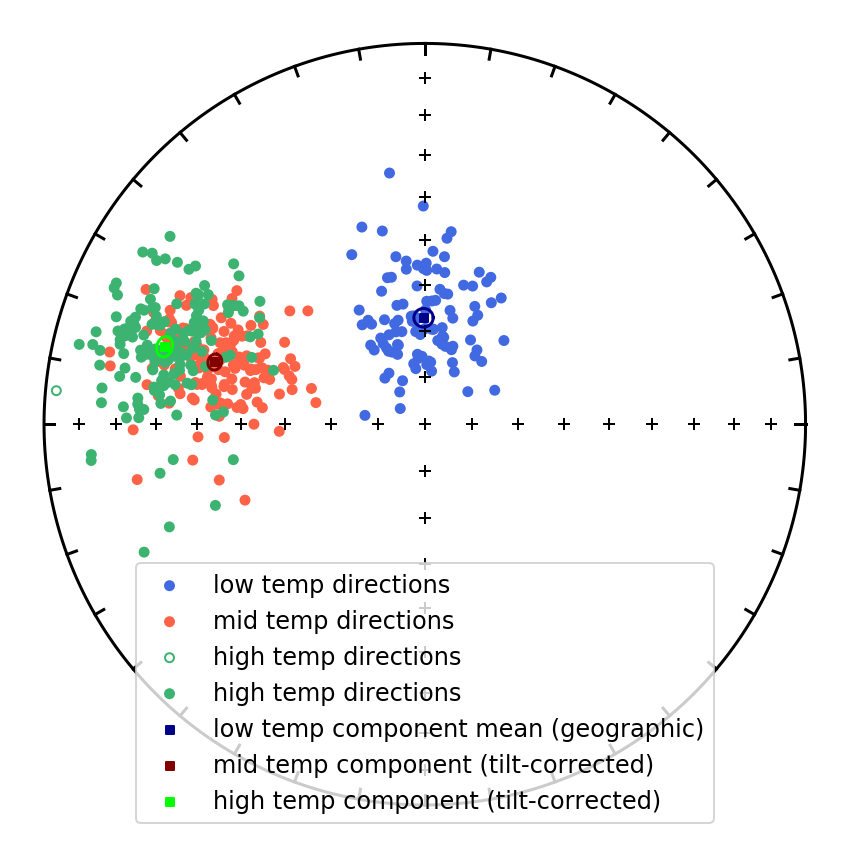

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='royalblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='mediumseagreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='maroon', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='lime', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=12)
# plt.savefig('../code_output/specimen_directions.pdf')
plt.show()

### low-temperature component

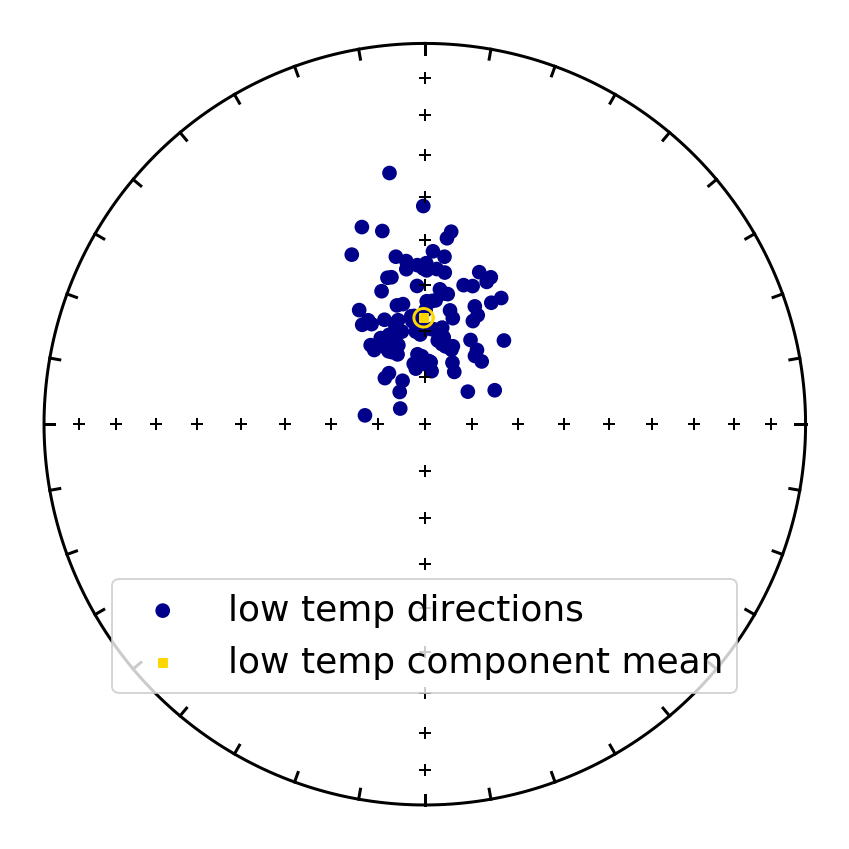

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='darkblue',label='low temp directions', markersize=40)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='gold', marker = 's', label='low temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.15),fontsize=18)
# plt.savefig('../code_output/specimen_directions_lt.pdf',transparent=True)
plt.show()

### mid-temperature CRM

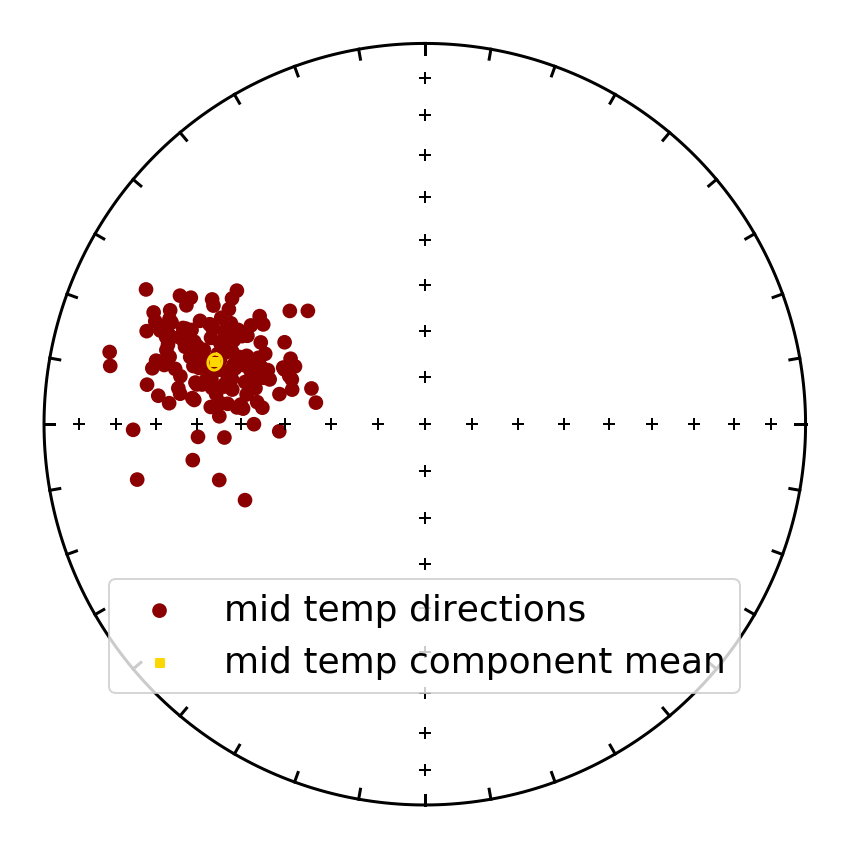

In [11]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='darkred',label='mid temp directions',markersize=40)

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                    color='gold', marker = 's', label='mid temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.15),fontsize=18)
# plt.savefig('../code_output/specimen_directions_mt.pdf',transparent=True)
plt.show()

### high-temperature DRM

There is one direction that has a negative inclination. Although it is the only one, there is no reason to excluded it from further analysis as it is possible to have paleosecular variation wandering to such directions.

In [12]:
specimens_ht_tc_above_0=specimens_ht_tc[specimens_ht_tc['dir_inc']<0]
specimens_ht_tc_below_0=specimens_ht_tc[specimens_ht_tc['dir_inc']>0]
specimens_ht_tc_above_0

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,geologic_classes,geologic_types,lithologies,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,primary_grain_size,rip_ups,strat_level
310,CF-134a,CF-134a_LP-DIR-T,CF-134,NaN,ht,275.2,-3.2,3.0,10.0,100.0,3.5,9.7,Sedimentary,Sediment Layer,Siltstone:Sandstone,960.0,937.0,K,NaN,hargrave 2021-02-13 19:30:03,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,2,n,62.0


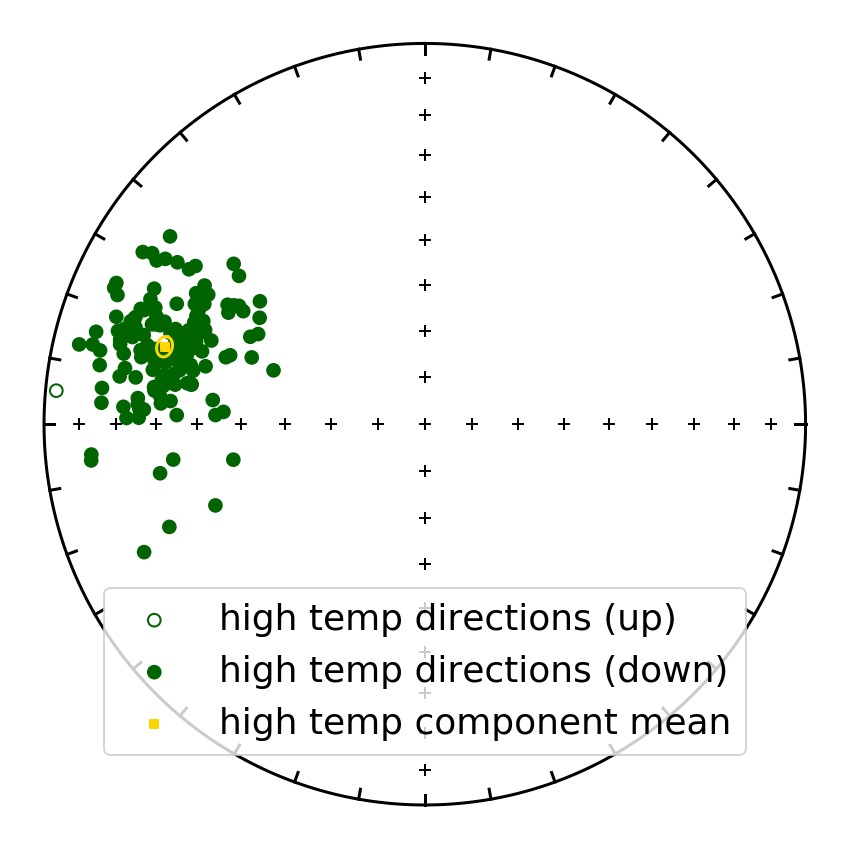

In [13]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_ht_tc_above_0['dir_dec'].tolist(),specimens_ht_tc_above_0['dir_inc'].tolist(),color='darkgreen',label='high temp directions (up)',markersize=40)
ipmag.plot_di(specimens_ht_tc_below_0['dir_dec'].tolist(),specimens_ht_tc_below_0['dir_inc'].tolist(),color='darkgreen',label='high temp directions (down)',markersize=40)

ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='gold', marker = 's', label='high temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.075),fontsize=18)
# plt.savefig('../code_output/specimen_directions_ht.pdf',transparent=True)
plt.show()

## Calculate Local geomagnetic field 

Calculate the local geomagnetic field at the study site both using the IGRF model and the long-term dipole field using the dipole equation.

In [14]:
local_igrf = ipmag.igrf([2020.7664, 188, Cutface_lat, Cutface_lon])
local_igrf_dec = local_igrf[0]
local_igrf_inc = local_igrf[1]

local_dipole_dec = 0
local_dipole_inc = ipmag.inc_from_lat(Cutface_lat)
local_igrf

array([  357.54683684372765,    73.09096917855972, 50931.788701421974  ])

## Expected direction from NSVG

Here we take the NSVG upper northeast sequence pole as calculated in Swanson-Hysell et al. 2019 and determine the predicted direction for the Cutface Creek section.

In [15]:
NSVG_Data=pd.read_csv('../data/data_Compiled/Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
Books1972_sites = pd.read_csv('../data/data_compiled/Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()

However, given that these data were developed from sites at different locations, they should be transformed to be at a common location of the Cut Face locality. To do this, we can take the VGPs from the sites and use the `pmag.vpg_di` function to transform them to declinations and inclinations at the Cut Face section. This does not make a large difference, but is the correct approach.

In [16]:
nneu_combined_vgp_lon = nneu_data_B72.vgp_lon.tolist() + nneu_data.vgp_lon.tolist()
nneu_combined_vgp_lat = nneu_data_B72.vgp_lat.tolist() + nneu_data.vgp_lat.tolist()

nneu_VGPs = ipmag.make_di_block(nneu_combined_vgp_lon,
                                nneu_combined_vgp_lat)
nneu_pole_mean=pmag.fisher_mean(nneu_VGPs)
ipmag.print_pole_mean(nneu_pole_mean)

Plon: 181.7  Plat: 31.1
Number of directions in mean (n): 28
Angular radius of 95% confidence (A_95): 4.2
Precision parameter (k) estimate: 42.2


### the expected each specimen directions for a common locality at Cut Face is calculated by converting the original vgps to directions at a common location 

In [22]:
Cut_Face_lon = -90.44128
Cut_Face_lat = 47.73055

nneu_dec_at_CF = []
nneu_inc_at_CF = []

for n in range(0,len(nneu_combined_vgp_lon)):
    di_tuple = pmag.vgp_di(nneu_combined_vgp_lat[n],
                           nneu_combined_vgp_lon[n],
                           Cut_Face_lat,
                           Cut_Face_lon)
    nneu_dec_at_CF.append(di_tuple[0])
    nneu_inc_at_CF.append(di_tuple[1])
    
nneu_dirs_block = ipmag.make_di_block(nneu_dec_at_CF, nneu_inc_at_CF)
nneu_dir_at_CF_mean=ipmag.fisher_mean(nneu_dec_at_CF,
                                      nneu_inc_at_CF)
ipmag.print_direction_mean(nneu_dir_at_CF_mean)

Dec: 291.3  Inc: 40.3
Number of directions in mean (n): 28
Angular radius of 95% confidence (a_95): 4.9
Precision parameter (k) estimate: 32.4


### but the expected mean direction is calculated by converting the original mean pole to mean direction at a common location.

In [138]:
NSVG_dec, NSVG_inc = pmag.vgp_di(nneu_pole_mean['inc'], nneu_pole_mean['dec'], Cut_Face_lat, Cut_Face_lon)

In [19]:
NSVG_A95 = round(nneu_dir_at_CF_mean['alpha95'],1)
NSVG_a95 = round(nneu_pole_mean['alpha95'], 1)

print('NSVG_a95:', NSVG_A95, 'NSVG_a95:', NSVG_a95)

NSVG_a95: 4.9 NSVG_a95: 4.2


In [20]:
mt_tc_di_block = ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())

In [23]:
mt_vs_NSVG_mean_test=ipmag.common_mean_watson(mt_tc_di_block,nneu_dirs_block)
mt_vs_NSVG_mean_test

Results of Watson V test: 

Watson's V:           3.8
Critical value of V:  6.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 4.0
Critical angle for M&M1990:   5.1
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.9509252518710283, 5.077417438141421, 'B')

### Plot expected inclination vs observed inclination

In [24]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [141]:
NE_NSVG_inc = NSVG_inc

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)
nsvg_f_2 = ipmag.squish(NE_NSVG_inc,.2)
nsvg_f_1 = ipmag.squish(NE_NSVG_inc,.1)

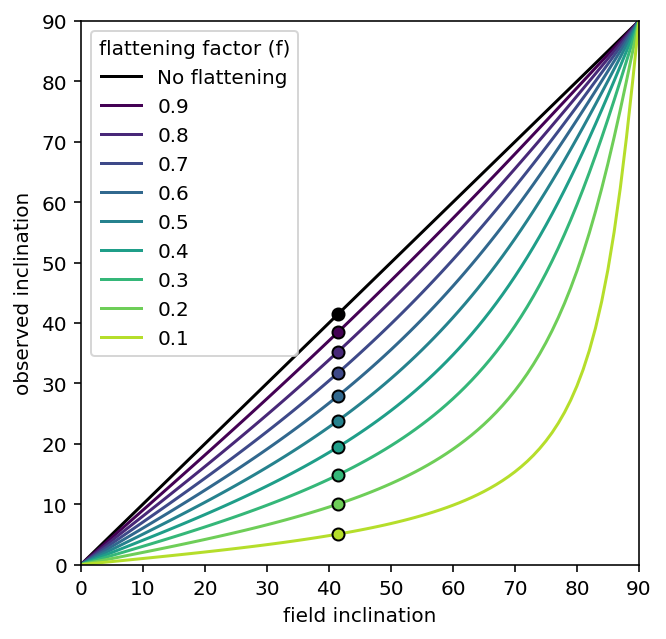

In [143]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_2, label='0.2', color=viridis(7))
plt.scatter(NE_NSVG_inc,nsvg_f_2,color=viridis(7),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_1, label='0.1', color=viridis(8))
plt.scatter(NE_NSVG_inc,nsvg_f_1,color=viridis(8),edgecolors='black',zorder=100)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
obs_vs_measure_plot.savefig('code_output/field_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

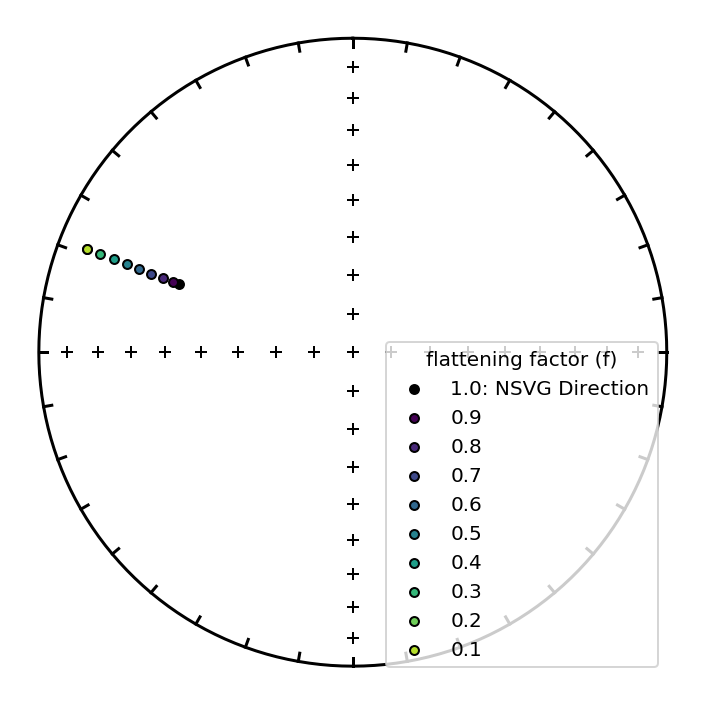

In [144]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(7), label='0.2',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(8), label='0.1',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
upper_nsvg_shallowing.savefig('code_output/upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

### direction component means

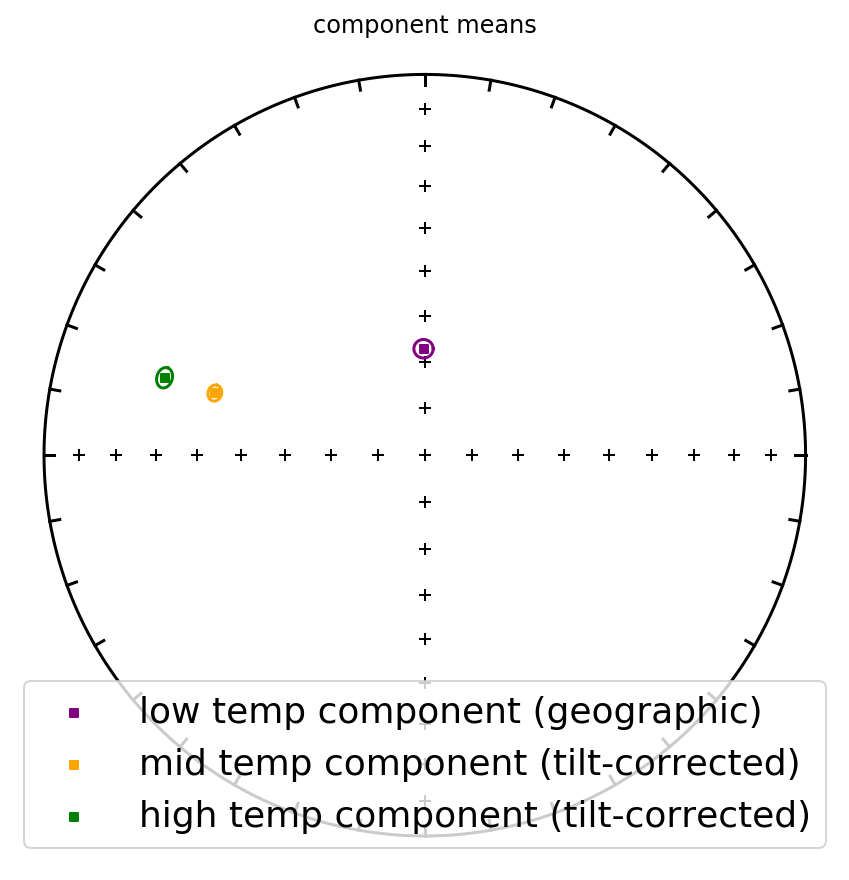

In [30]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='purple', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='orange', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='green', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=18)
plt.title('component means')
plt.show()

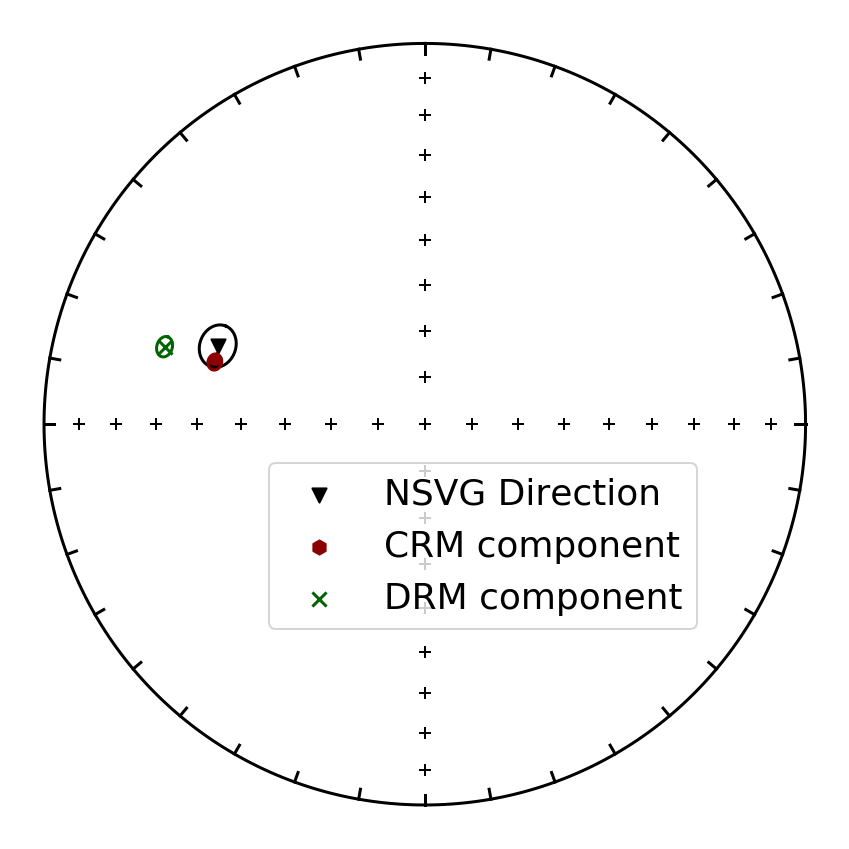

In [139]:
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_a95, label='NSVG Direction',color= 'k',marker='v',markersize=50) #need to replace with direction A95

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color= 'darkred', marker = 'h', label='CRM component',markersize=50)
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 'x', label='DRM component',markersize=50)

plt.legend(loc=[.31,.25],fontsize=18)
plt.savefig('code_output/cf_results_stereonet.pdf', bbox_inches='tight',transparent=True)

plt.show()

## Empirical flattening factor determination

$tan(I_{observed}) = f*tan(I_{field})$

$I_{observed}$ : inclination of sedimentary rock \
$I_{field}$ : inclination of local magnetic field when rock was magnetized \
$f$ : flattening factor

$f = tan(I_{observed})/tan(I_{field})$

In [34]:
f_factor_ht_mt = round(np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(mean_mt['inc'])),2)
f_factor_ht_mt

0.63

In [36]:
f_factor_ht_NSVG = round(np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(nneu_dir_at_CF_mean['inc'])), 2)
f_factor_ht_NSVG

0.66

## Implement the TK03 E/I method on the ht component

In [37]:
ht_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),
                                     specimens_ht_tc['dir_inc'].tolist())
# ht_tc_di_block

Bootstrapping.... be patient

The original inclination was: 29.43

The corrected inclination is: 40.74
with bootstrapped confidence bounds of: 33.44 to 48.1
and elongation parameter of: 1.93
The flattening factor is: 0.64
with bootstrapped confidence bounds of: 0.85 to 0.51


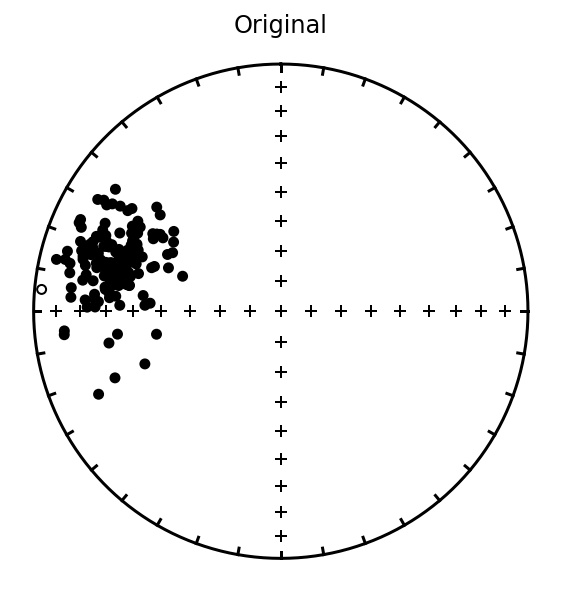

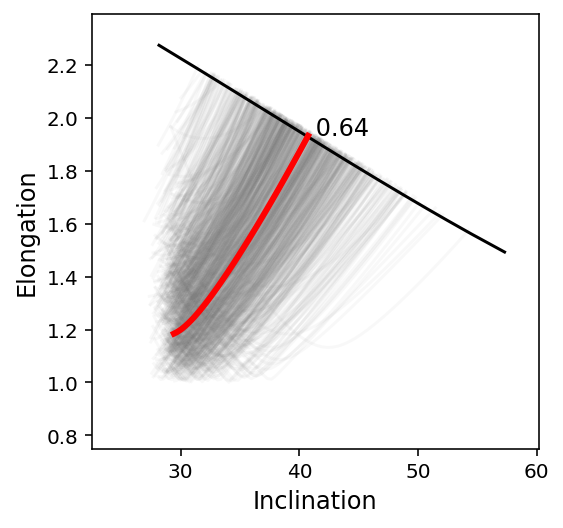

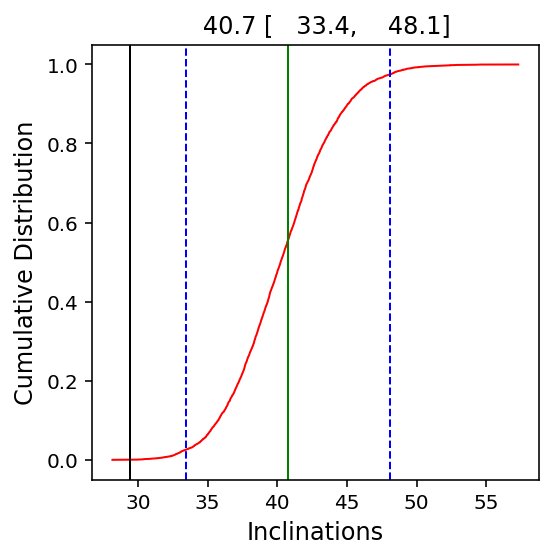

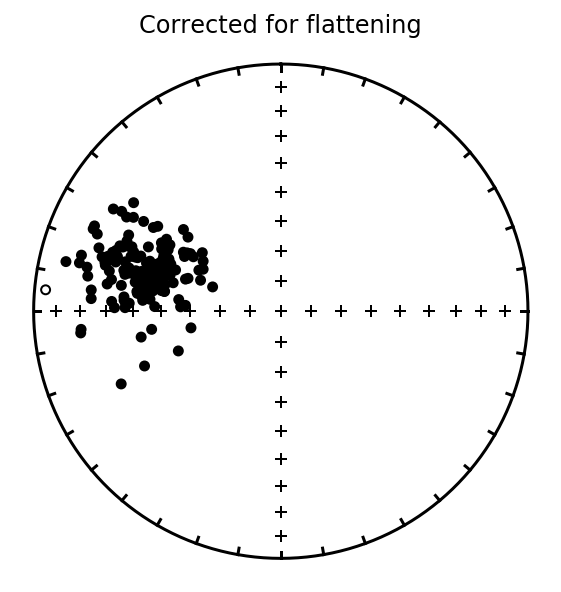

In [38]:
ht_tc_ei_corrected, EI_incs, EI_elongs, EI_fs = ipmag.find_ei(np.array(ht_tc_di_block), nb=5000, save=0, return_new_dirs=1, return_values=True, 
                                                              save_folder='./code_output',fmt='png', tight_axes=1)

### the 2.5th and 97.5th percentile of f values from the TK03 result

In [120]:
best_f_EI = 0.64
EI_f_lower, EI_f_upper = np.round(np.percentile(EI_fs, [2.5, 97.5]), 2)
EI_f_lower, EI_f_upper

(0.51, 0.85)

## resultant f value distribution of the E/I result

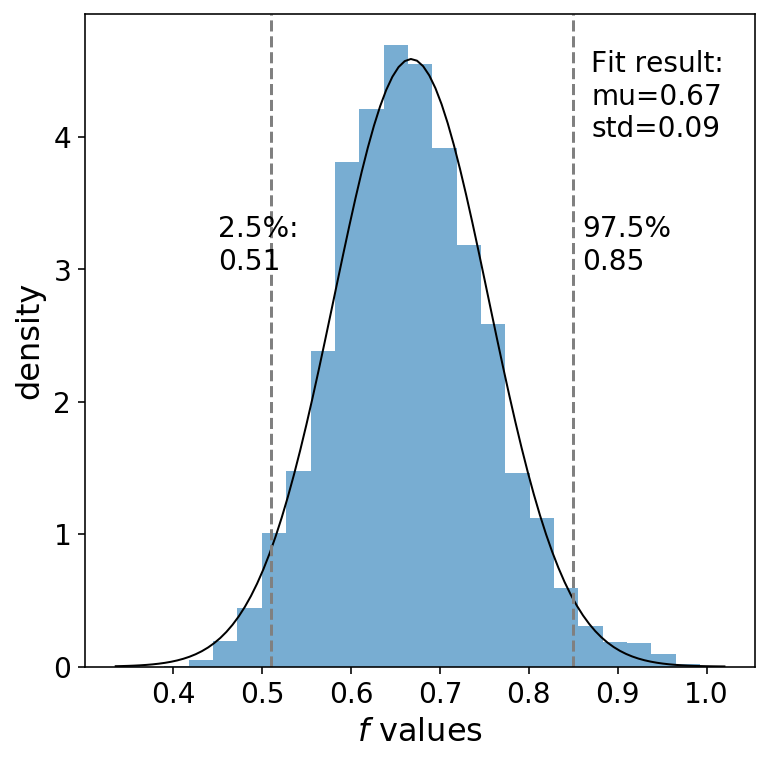

In [42]:
lower, upper = np.round(np.percentile(EI_fs, [2.5, 97.5]), 2)
mu, std = norm.fit(EI_fs)
x = np.linspace(min(EI_fs), max(EI_fs), 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(6,6))
plt.hist(EI_fs, bins=25, alpha=0.6, density=1)
# plt.title('All $f$ factors from bootstrap $E/I$ result', fontsize=14)
plt.plot(x, p, 'k', linewidth=1)

plt.text(0.87, 4, 'Fit result:\nmu='+str(round(mu,2))+'\nstd='+str(round(std, 2)), fontsize=14)

plt.axvline(x=lower, color = 'gray', ls='--')
plt.axvline(x=upper, color = 'gray', ls='--')

plt.text(0.45, 3, '2.5%:\n'+str(lower), fontsize=14)
plt.text(0.86, 3, '97.5%\n'+str(upper), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$f$ values', fontsize=16)
plt.ylabel('density', fontsize=16)

# plt.savefig('../code_output/EI_f_histogram.pdf', bbox_inches='tight')
plt.show()

## resultant corrected paleolatitude distribution of the E/I result

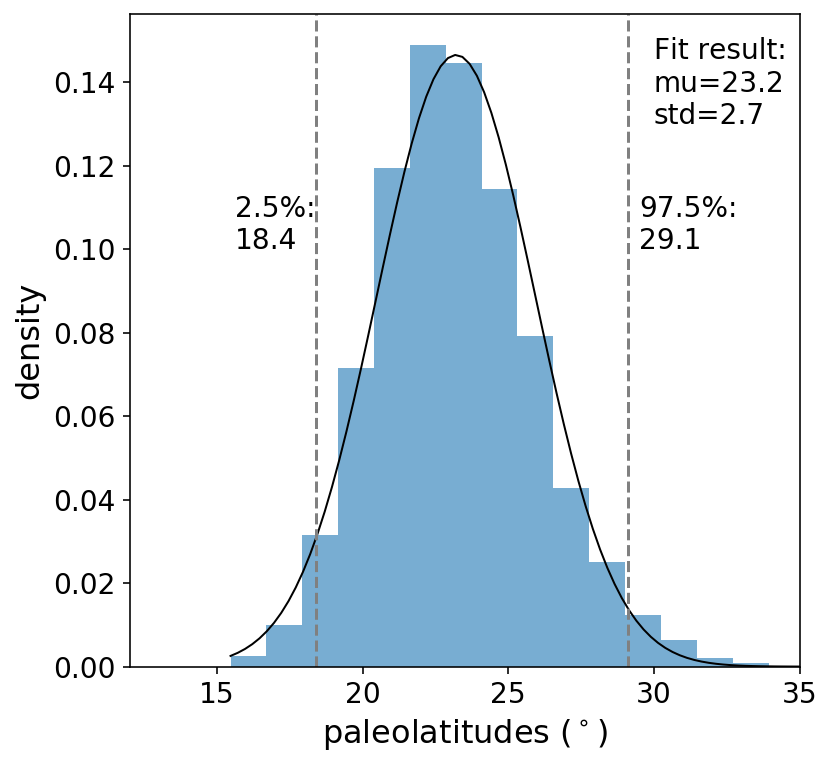

In [40]:
EI_plats = np.degrees(np.arctan(np.tan(np.radians(EI_incs))/2))

lower, upper = np.round(np.percentile(EI_plats, [2.5, 97.5]), 1)
mu, std = norm.fit(EI_plats)
x = np.linspace(min(EI_plats), max(EI_plats), 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(6,6))
plt.hist(EI_plats, bins=20, alpha=0.6, density=1)
plt.plot(x, p, 'k', linewidth=1)

plt.text(30, 0.13, 'Fit result:\nmu='+str(round(mu,1))+'\nstd='+str(round(std, 1)), fontsize=14)

plt.axvline(x=lower, color = 'gray', ls='--')
plt.axvline(x=upper, color = 'gray', ls='--')

plt.text(15.6, 0.10, '2.5%:\n'+str(lower), fontsize=14)
plt.text(29.5, 0.10, '97.5%:\n'+str(upper), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(12, 35)
plt.xlabel('paleolatitudes ($^\circ$)', fontsize=16)
plt.ylabel('density', fontsize=16)
# plt.savefig('../code_output/EI_Plat_histogram.pdf', bbox_inches='tight')

plt.show()

Although the paleolatitudes do not pass a K-S statistical test with the fitted normal distribution, the shape of the distribution is nevertheless well approximated by the distribution

In [41]:
st.kstest(EI_plats, norm(loc=mu, scale=std).cdf)

KstestResult(statistic=0.028742456540008177, pvalue=0.000516652064694602)

## Implement the TK03 E/I method on the ht and mt component combined

it is of interest to investigate what the E/I result would look like when we combine the ht and mt directions. The reason for testing this is that legacy red beds sedimentary paleomagnetic data may not fully resolve the detrital and pigmentary hematite components due to coarse stepwise demagnetization. The resulting directions from such protocols may resulting a mixing of ht and mt components in the reported site-level DRM. We explore the range of f factors for Cut Face dataset when both ht and mt directions are used for estimating the amount of inclination shallowing

In [42]:
ht_mt_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist()+specimens_ht_tc['dir_dec'].tolist(),
                                     specimens_mt_tc['dir_inc'].tolist()+specimens_mt_tc['dir_inc'].tolist())

Bootstrapping.... be patient

The original inclination was: 41.73

The corrected inclination is: 51.03
with bootstrapped confidence bounds of: 44.64 to 57.94
and elongation parameter of: 1.65
The flattening factor is: 0.71
with bootstrapped confidence bounds of: 0.9 to 0.56


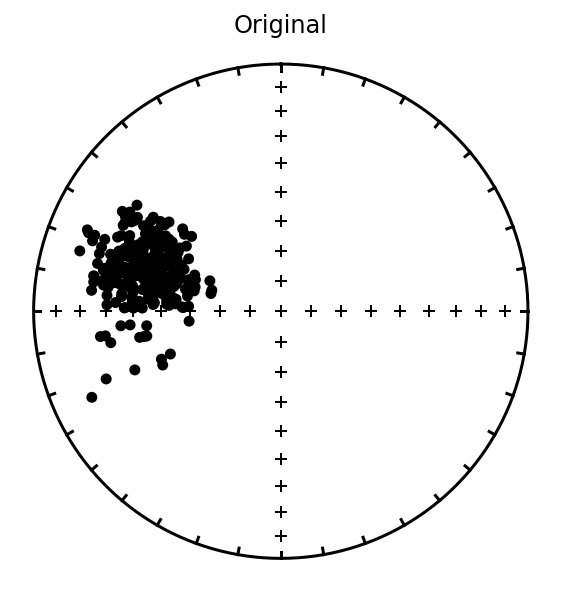

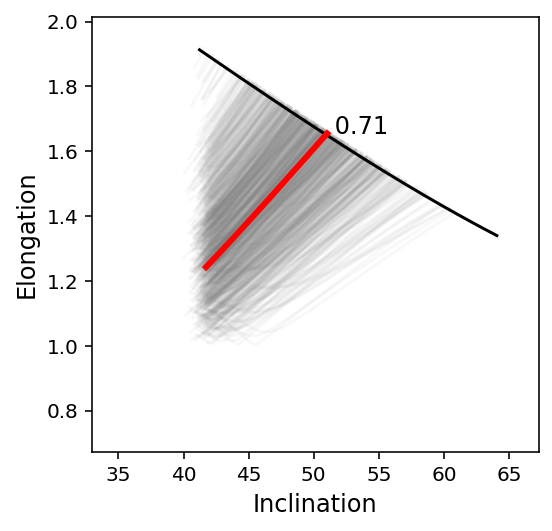

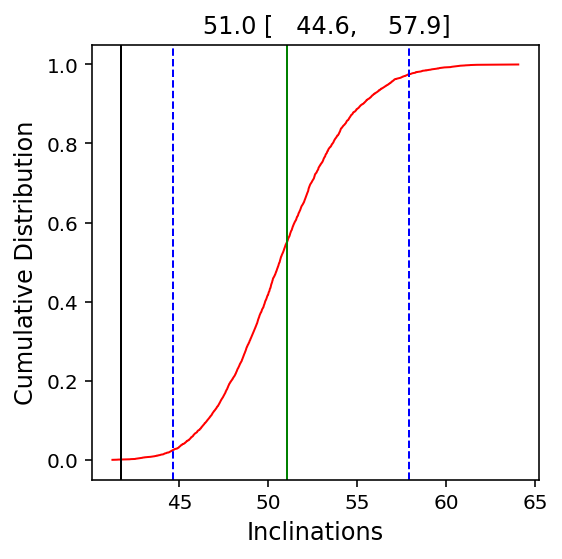

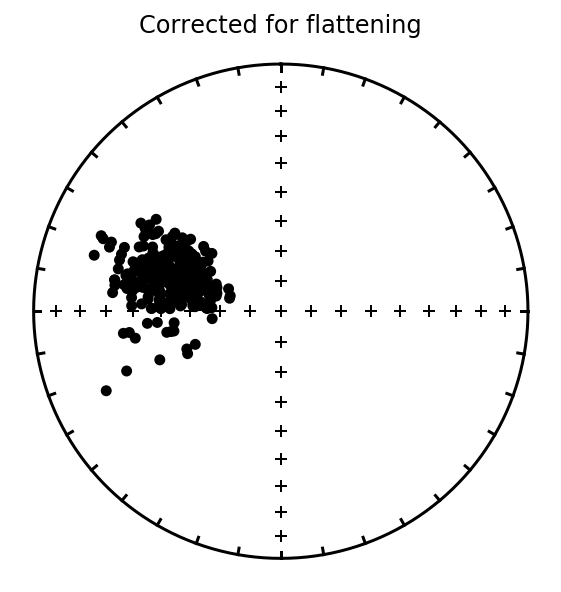

In [43]:
ht_mt_tc_ei_corrected, ht_mt_EI_incs, ht_mt_EI_elongs, ht_mt_EI_fs = ipmag.find_ei(np.array(ht_mt_tc_di_block), nb=5000, 
                                                                                   save=0, return_new_dirs=1, return_values=True, 
                                                              save_folder='./../code_output',fmt='png', tight_axes=1)

## common mean test between f=0.51 and f=0.85 (the 95% bounds from result of E/I method)

we demonstrate here that the uncertainty in f values resulting from the E/I method results in significant mean pole position changes such that the Cut Face mean pole position corrected with the 2.5 and 97.5 percentile bounds do not share a common mean

In [45]:
original_dir_blocks = specimens_ht_tc[['dir_dec', 'dir_inc']].to_numpy()
dir_blocks_51 = np.array([original_dir_blocks.T[0], ipmag.unsquish(original_dir_blocks.T[1], EI_f_lower)]).T
dir_blocks_85 = np.array([original_dir_blocks.T[0], ipmag.unsquish(original_dir_blocks.T[1], EI_f_upper)]).T

dir_blocks_51_mean = ipmag.fisher_mean(di_block=dir_blocks_51)
dir_blocks_85_mean = ipmag.fisher_mean(di_block=dir_blocks_85)

dir_blocks_51_pole = pmag.dia_vgp(dir_blocks_51_mean['dec'], dir_blocks_51_mean['inc'], dir_blocks_51_mean['alpha95'], Cutface_lat, Cutface_lon)
dir_blocks_85_pole = pmag.dia_vgp(dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc'], dir_blocks_85_mean['alpha95'], Cutface_lat, Cutface_lon)

### angle between directions corrected by 95% bounds of f values

In [46]:
np.round(pmag.angle([dir_blocks_51_mean['dec'], dir_blocks_51_mean['inc']], [dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc']]),1)

array([13.3])

### angle between poles corrected by 95% bounds of f values

In [47]:
np.round(pmag.angle(dir_blocks_51_pole, dir_blocks_85_pole),1)

array([9.7])

In [47]:
ipmag.common_mean_watson(dir_blocks_51, dir_blocks_85)

Results of Watson V test: 

Watson's V:           139.2
Critical value of V:  6.3
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 13.3
Critical angle for M&M1990:   2.8



(0, 13.284706946757176, 2.8254088725860393)

# import empirical common mean test results from notebook Cutface_commone_mean

In [119]:
common_mean_mt = pd.read_csv('code_output/common_mean_mt.csv')
common_mean_nneu = pd.read_csv('code_output/common_mean_nneu.csv')
common_mean_fm = pd.read_csv('code_output/common_mean_fm.csv')
common_mean_vf = pd.read_csv('code_output/common_mean_vf.csv')
common_mean_silt = pd.read_csv('code_output/common_mean_silt.csv')

common_mean_mt_pass = common_mean_mt[common_mean_mt['result']=='pass']
common_mean_nneu_pass = common_mean_nneu[common_mean_nneu['result']=='pass']
common_mean_fm_pass = common_mean_fm[common_mean_fm['result']=='pass']
common_mean_vf_pass = common_mean_vf[common_mean_vf['result']=='pass']
common_mean_silt_pass = common_mean_silt[common_mean_silt['result']=='pass']

In [51]:
common_mean_mt

,f_factors,angles,critical_angles,result
0,0.540,3.100433,2.545167,fail
1,0.541,3.051402,2.517951,fail
2,0.542,3.002459,2.457671,fail
3,0.543,2.953605,2.559907,fail
4,0.544,2.904839,2.474164,fail
...,...,...,...,...
135,0.675,2.790815,2.559653,fail
136,0.676,2.829493,2.558829,fail
137,0.677,2.868105,2.562199,fail
138,0.678,2.906651,2.542879,fail


In [107]:
index_angle_mt = common_mean_mt[common_mean_mt['result']=='pass']['angles'].idxmin()
best_f_mt = common_mean_mt.loc[index_angle_mt]['f_factors']

In [108]:
print('The smallest angle between ht and mt data sets is',round(common_mean_mt.iloc[index_angle_mt]['angles'],2), 
      '\nwhich corresponds to an f factor of', round(best_f_mt,2),'.')

The smallest angle between ht and mt data sets is 0.01 
which corresponds to an f factor of 0.61 .


In [109]:
index_angle_nneu = common_mean_nneu[common_mean_nneu['result']=='pass']['angles'].idxmin()
best_f_nneu = common_mean_nneu.loc[index_angle_nneu]['f_factors']

In [110]:
print('The smallest angle between ht and NSVG data sets is',round(common_mean_nneu.iloc[index_angle_nneu]['angles'],2), 
      '\nwhich corresponds to an f factor of', round(best_f_nneu,2),'.')

The smallest angle between ht and NSVG data sets is 3.63 
which corresponds to an f factor of 0.65 .


In [111]:
index_angle_fm = common_mean_fm[common_mean_fm['result']=='pass']['angles'].idxmin()
best_f_fm = common_mean_fm.loc[index_angle_fm]['f_factors']

In [112]:
print('The smallest angle between fine and medium grained ht and NSVG data sets is',
      round(common_mean_fm.iloc[index_angle_fm]['angles'],2), 
      '\nwhich corresponds to an f factor of', round(best_f_fm,2),'.')

The smallest angle between fine and medium grained ht and NSVG data sets is 4.16 
which corresponds to an f factor of 0.74 .


In [113]:
index_angle_vf = common_mean_vf[common_mean_vf['result']=='pass']['angles'].idxmin()
best_f_vf = common_mean_vf.loc[index_angle_vf]['f_factors']

In [114]:
print('The smallest angle between very fine grained ht and NSVG data sets is',
      round(common_mean_vf.iloc[index_angle_vf]['angles'],2), 
      '\nwhich corresponds to an f factor of', round(best_f_vf,2),'.')

The smallest angle between very fine grained ht and NSVG data sets is 3.9 
which corresponds to an f factor of 0.66 .


In [117]:
index_angle_silt = common_mean_silt[common_mean_silt['result']=='pass']['angles'].idxmin()
best_f_silt = common_mean_silt.loc[index_angle_silt]['f_factors']

In [118]:
print('The smallest angle between silt grained ht and NSVG data sets is',
      round(common_mean_silt.iloc[index_angle_silt]['angles'],2), 
      '\nwhich corresponds to an f factor of', round(best_f_silt,2),'.')

The smallest angle between silt grained ht and NSVG data sets is 2.99 
which corresponds to an f factor of 0.56 .


# plot elongation vs. inclination of the original directions and inclination corrected directions

In [98]:
def elongation_calc(di_block):
    princ_comps = pmag.doprinc(di_block)
    elongation = princ_comps['tau2']/princ_comps['tau3']
    return elongation

def elongation_bootstrap(di_block, nb=1000):
    elong_list = []
    inc_list = []
    for n in range(nb): 
        pDIs = pmag.pseudo(di_block)
        pseudo_elong = elongation_calc(pDIs)
        elong_list.append(pseudo_elong)
        mean = pmag.fisher_mean(pDIs)
        inc_list.append(mean['inc'])
    low = round(np.percentile(elong_list, 2.5), 4)
    high = round(np.percentile(elong_list,97.5), 4)
    elong = round(elongation_calc(di_block), 4)
    mean = pmag.fisher_mean(di_block)
    inc = mean['inc']
    inc_low = round(np.percentile(inc_list, 2.5), 4)
    inc_high = round(np.percentile(inc_list, 97.5), 4)
    return [elong, low, high], [inc, inc_low, inc_high]
#     return [elong_list, elong, low, high], [inc_list, inc, inc_low, inc_high]
#     print(elong, low, high, inc, inc_low, inc_high)
    
xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

In [93]:
ht_unsquished_incs = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(),common_mean_nneu.loc[index_angle_nneu]['f_factors'])
ht_di_block_f_corrected = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_unsquished_incs)

mt_elong, mt_inc = elongation_bootstrap(mt_tc_di_block)
ht_elong, ht_inc = elongation_bootstrap(ht_tc_di_block)
ht_elong_ei, ht_inc_ei = elongation_bootstrap(ht_tc_ei_corrected)
ht_elong_f, ht_inc_f = elongation_bootstrap(ht_di_block_f_corrected)

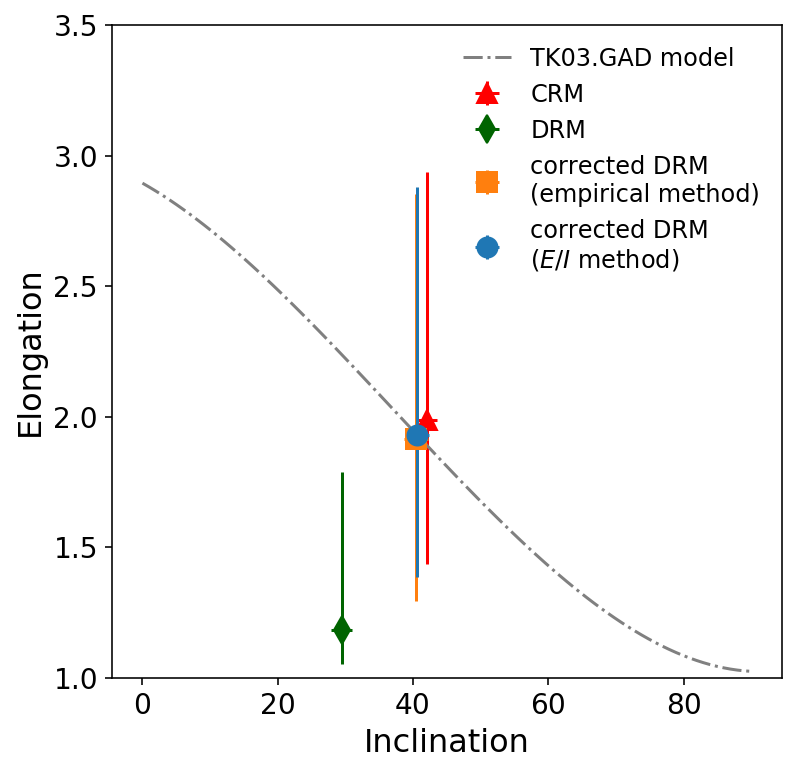

In [97]:
tk03_curve=plt.figure(figsize=(6,6))
plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD model',linestyle='-.')
plt.ylim(1,3.5)
plt.errorbar(mt_inc[0], mt_elong[0], yerr=[[mt_elong[0]-mt_elong[1]],[mt_elong[2]-mt_elong[0]]], 
             xerr=[[mt_inc[0]-mt_inc[1]],[mt_inc[2]-mt_inc[0]]], 
             fmt='^', ms=10,color='r', label='CRM')
plt.errorbar(ht_inc[0], ht_elong[0], yerr=[[ht_elong[0]-ht_elong[1]],[ht_elong[2]-ht_elong[0]]], 
             xerr=[[ht_inc[0]-ht_inc[1]],[ht_inc[2]-ht_inc[0]]], 
             fmt='d', ms=10,color='darkgreen', label='DRM')
plt.errorbar(ht_inc_f[0], ht_elong_f[0], yerr=[[ht_elong_f[0]-ht_elong_f[1]],[ht_elong_f[2]-ht_elong_f[0]]], 
             xerr=[[ht_inc_f[0]-ht_inc_f[1]],[ht_inc_f[2]-ht_inc_f[0]]], 
             fmt='s', ms=10,color='C1', label='corrected DRM\n(empirical method)')
plt.errorbar(ht_inc_ei[0], ht_elong_ei[0], yerr=[[ht_elong_ei[0]-ht_elong_ei[1]],[ht_elong_ei[2]-ht_elong_ei[0]]], 
             xerr=[[ht_inc_ei[0]-ht_inc_ei[1]],[ht_inc_ei[2]-ht_inc_ei[0]]], 
             fmt='o', ms=10,color='C0', label='corrected DRM\n($E/I$ method)')
plt.ylabel('Elongation', fontsize=16)
plt.xlabel('Inclination', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, frameon=0, fontsize=12)
# tk03_curve.savefig('./code_output/tk03_curve.pdf', bbox_inches='tight')
plt.show()

## Difference in shallowing as a function of grain size

In [99]:
cf_fm_grain=Cutface_specimens[(Cutface_specimens['primary_grain_size']>=3) & 
                                                  (Cutface_specimens['dir_comp']=='ht')&
                                                  (Cutface_specimens['dir_tilt_correction']==100)]

cf_vfs_grain=Cutface_specimens[(Cutface_specimens['primary_grain_size']==2) & 
                                               (Cutface_specimens['dir_comp']=='ht')&
                                               (Cutface_specimens['dir_tilt_correction']==100)]

cf_silt_grain=Cutface_specimens[(Cutface_specimens['primary_grain_size']<=1) & 
                                                (Cutface_specimens['dir_comp']=='ht')&
                                                (Cutface_specimens['dir_tilt_correction']==100)]

### fine to medium grained specimens

In [100]:
cf_fm_grain_mean=ipmag.fisher_mean(cf_fm_grain['dir_dec'].tolist(),cf_fm_grain['dir_inc'].tolist())
# cf_fm_grain_mean

### very fine grained specimens

In [101]:
cf_vfs_grain_mean=ipmag.fisher_mean(cf_vfs_grain['dir_dec'].tolist(),cf_vfs_grain['dir_inc'].tolist())
# cf_vfs_grain_mean

### silt and clay

In [102]:
cf_silt_grain_mean=ipmag.fisher_mean(cf_silt_grain['dir_dec'].tolist(),cf_silt_grain['dir_inc'].tolist())
# cf_silt_grain_mean

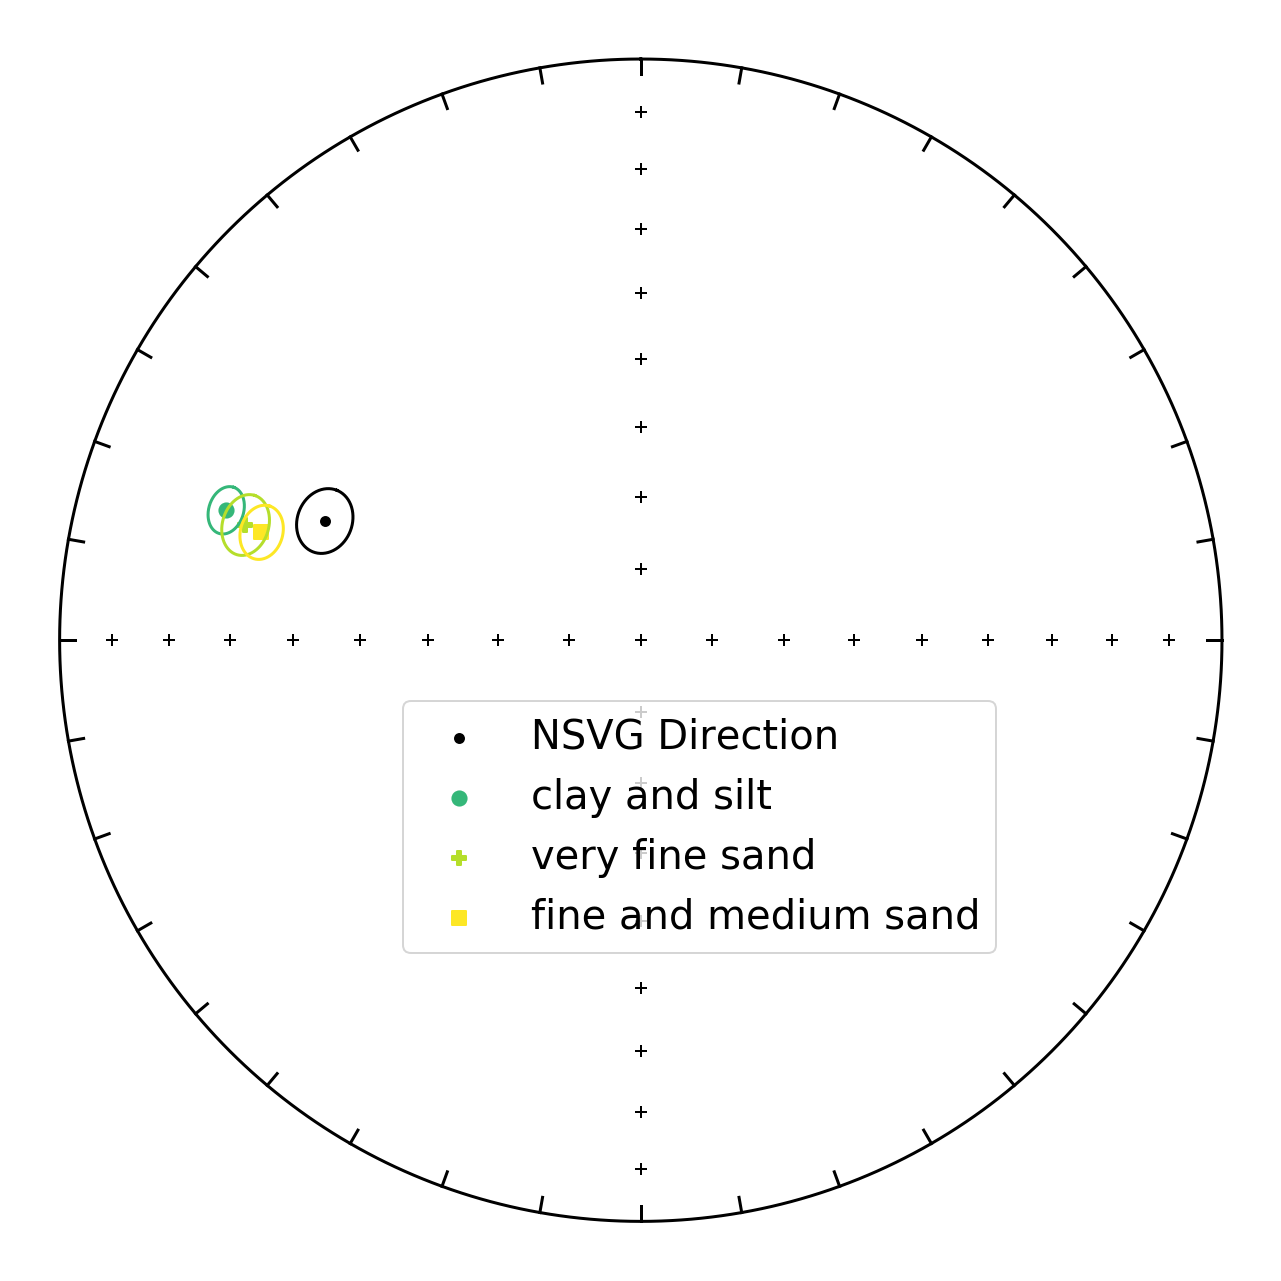

In [140]:
grain_size_stereonet=plt.figure(num=fignum,figsize=(9,9))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_a95, label='NSVG Direction') #need to replace with direction a95
ipmag.plot_di_mean(cf_silt_grain_mean['dec'],cf_silt_grain_mean['inc'],cf_silt_grain_mean['alpha95'],color= viridis(6),label='clay and silt',marker='o',markersize=50)
ipmag.plot_di_mean(cf_vfs_grain_mean['dec'],cf_vfs_grain_mean['inc'],cf_vfs_grain_mean['alpha95'],color=viridis(8), label='very fine sand',marker='P',markersize=50)
ipmag.plot_di_mean(cf_fm_grain_mean['dec'],cf_fm_grain_mean['inc'],cf_fm_grain_mean['alpha95'],color=viridis(10),label='fine and medium sand',marker='s',markersize=50)

plt.legend(loc=[.31,.25],fontsize=20)
grain_size_stereonet.savefig('./code_output/grain_size_stereonet.pdf', bbox_inches='tight',transparent=True)                   
plt.show()

## Below we show that there is minimal stgrtigraphic bias of inclination shallowing in Cut Face

In [73]:
specimens_above_68_meters=specimens_ht_tc[specimens_ht_tc['strat_level']>=68]
specimens_below_68_meters=specimens_ht_tc[specimens_ht_tc['strat_level']<68]

In [74]:
mean_above_68_meters = ipmag.fisher_mean(specimens_above_68_meters['dir_dec'].tolist(),specimens_above_68_meters['dir_inc'].tolist())
mean_above_68_meters

{'dec': 288.6872294044219,
 'inc': 29.397291005180204,
 'n': 30,
 'r': 29.372164239278163,
 'k': 46.190424015761785,
 'alpha95': 3.9087844396735054,
 'csd': 11.918155414579386}

In [75]:
mean_below_68_meters = ipmag.fisher_mean(specimens_below_68_meters['dir_dec'].tolist(),specimens_below_68_meters['dir_inc'].tolist())
mean_below_68_meters

{'dec': 286.073720248442,
 'inc': 29.43319705285495,
 'n': 127,
 'r': 123.28614415333222,
 'k': 33.92700341696141,
 'alpha95': 2.181584307973112,
 'csd': 13.906321564106875}

## export specimen data .csv file with strat heights with grain size

In [76]:
gs_mapping = pd.Series(data=['silt', 'silt', 'very fine', 'fine', 'medium'] , index=[0,1,2,3,4])
gs_mapping

0         silt
1         silt
2    very fine
3         fine
4       medium
dtype: object

In [77]:
Cutface_specimens.columns

Index(['specimen', 'experiments', 'sample', 'dir_alpha95', 'dir_comp',
       'dir_dec', 'dir_inc', 'dir_n_comps', 'dir_n_measurements',
       'dir_tilt_correction', 'dir_dang', 'dir_mad_free', 'geologic_classes',
       'geologic_types', 'lithologies', 'meas_step_max', 'meas_step_min',
       'meas_step_unit', 'analysts', 'instrument_codes', 'software_packages',
       'int_corr', 'citations', 'method_codes', 'result_quality', 'volume',
       'weight', 'primary_grain_size', 'rip_ups', 'strat_level'],
      dtype='object')

In [79]:
# specimens_w_strat_gs = pd.merge(Cutface_specimens[['specimen', 'primary_grain_size', 'experiments',
#        'sample', 'dir_alpha95', 'dir_comp', 'dir_dec', 'dir_inc',
#        'dir_n_comps', 'dir_n_measurements', 'dir_tilt_correction', 'dir_dang',
#        'dir_mad_free', 'meas_step_max', 'meas_step_min', 'meas_step_unit',
#        'analysts', 'instrument_codes', 'software_packages', 'int_corr',
#        'citations', 'method_codes', 'result_quality', 'volume', 'weight',
#        'location', 'site']],strat_heights, on='specimen')
# specimens_w_strat_gs['grain_size'] = [gs_mapping[i] for i in specimens_w_strat_gs['primary_grain_size']]
# specimens_w_strat_gs

In [80]:
# specimens_w_strat_gs.to_csv('../../data/Pmag/cutface/specimens_w_strat_gs.txt', sep='\t', index=0)

# Summary plot for f factor

In [ ]:
common_mean_mt_pass = common_mean_mt[common_mean_mt['result']=='pass']
common_mean_nneu_pass = common_mean_nneu[common_mean_nneu['result']=='pass']
common_mean_fm_pass = common_mean_fm[common_mean_fm['result']=='pass']
common_mean_vf_pass = common_mean_vf[common_mean_vf['result']=='pass']
common_mean_silt_pass = common_mean_silt[common_mean_silt['result']=='pass']

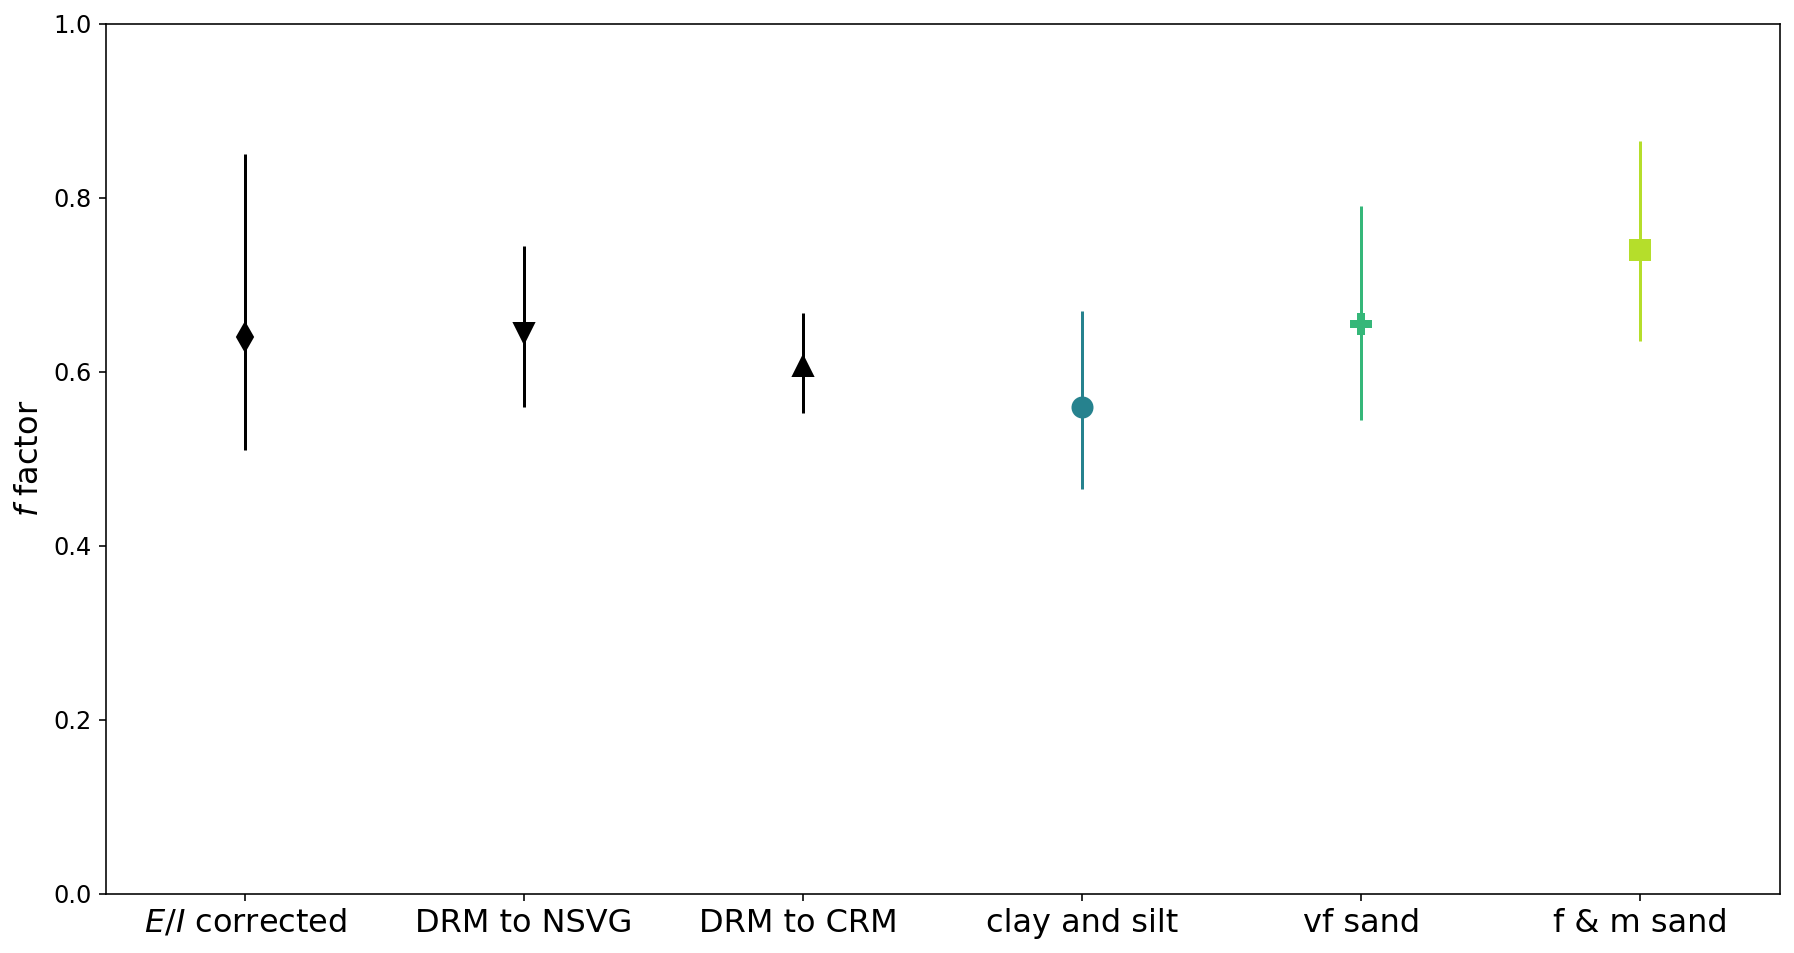

In [136]:
summary_f_figure=plt.figure(figsize=(15,8))
plt.ylim(.35,.925)

final_f_ei=['$E/I$ corrected']
final_f_nsvg=['DRM to NSVG']
final_f=['DRM to CRM ']
clay_silt=['clay and silt']
vf_sand=['vf sand']
f_m_sand=['f & m sand']


plt.ylim(0,1)
plt.yticks(fontsize=12)
plt.xticks(fontsize=16)
plt.ylabel('$f$ factor',fontsize=16)

plt.margins(x=.1)

plt.errorbar(final_f_ei, best_f_EI, yerr=np.abs([[EI_f_lower-best_f_EI], 
                                                 [EI_f_upper-best_f_EI]]), 
             marker='d',markersize=10,color= 'k')

plt.errorbar(final_f_nsvg,best_f_nneu, 
             yerr=np.abs([[common_mean_nneu_pass['f_factors'].min()-best_f_nneu], 
                          [common_mean_nneu_pass['f_factors'].max()-best_f_nneu]]), 
             marker='v',markersize=10,color= 'k')

plt.errorbar(final_f,best_f_mt, 
             yerr=np.abs([[common_mean_mt_pass['f_factors'].min()-best_f_mt], 
                          [common_mean_mt_pass['f_factors'].max()-best_f_mt]]), 
             marker='^',markersize=10,color= 'k')

plt.errorbar(clay_silt,best_f_silt, 
             yerr=np.abs([[common_mean_silt_pass['f_factors'].min()-best_f_silt], 
                          [common_mean_silt_pass['f_factors'].max()-best_f_silt]]), 
             marker='o',markersize=10,color= viridis(4))

plt.errorbar(vf_sand,best_f_vf, 
             yerr=np.abs([[common_mean_vf_pass['f_factors'].min()-best_f_vf], 
                          [common_mean_vf_pass['f_factors'].max()-best_f_vf]]), 
             marker='P',markersize=10,color= viridis(6))

plt.errorbar(f_m_sand,best_f_fm, 
             yerr=np.abs([[common_mean_fm_pass['f_factors'].min()-best_f_fm], 
                          [common_mean_fm_pass['f_factors'].max()-best_f_fm]]), 
             marker='s',markersize=10,color= viridis(8))

plt.savefig('./code_output/summary_f_figure.pdf',bbox_inches='tight',transparent=True)

plt.show()

# Appendix: show the application of the ipmag.find_ei_kent function in PmagPy that streamlines the E/I method and Kent ellipse parameter estimate

Bootstrapping.... be patient



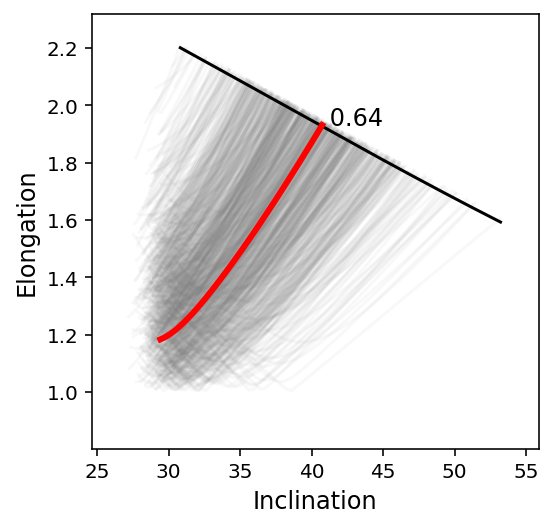

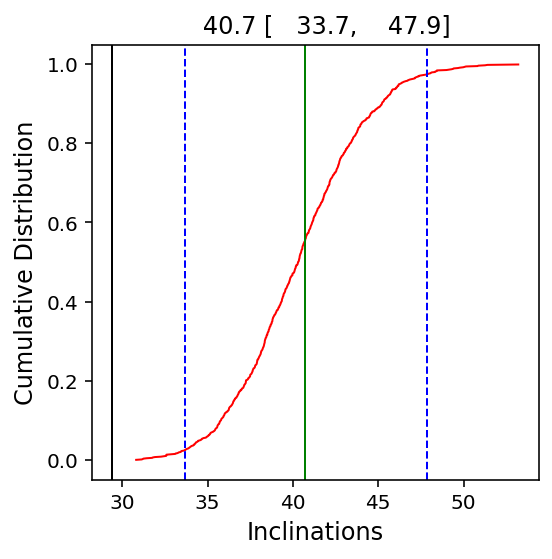

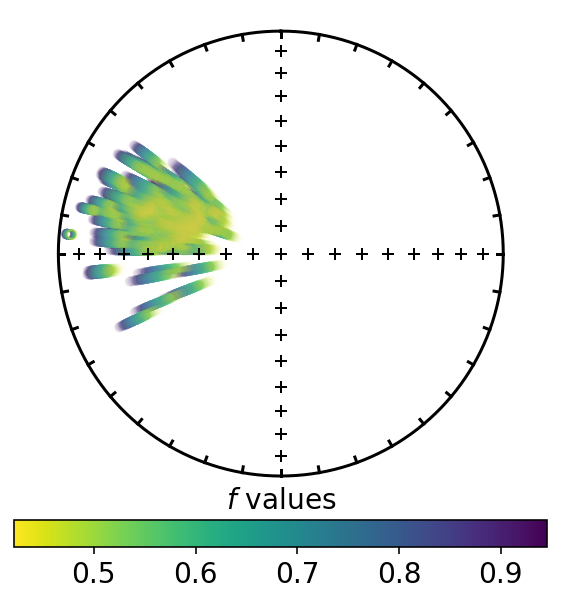

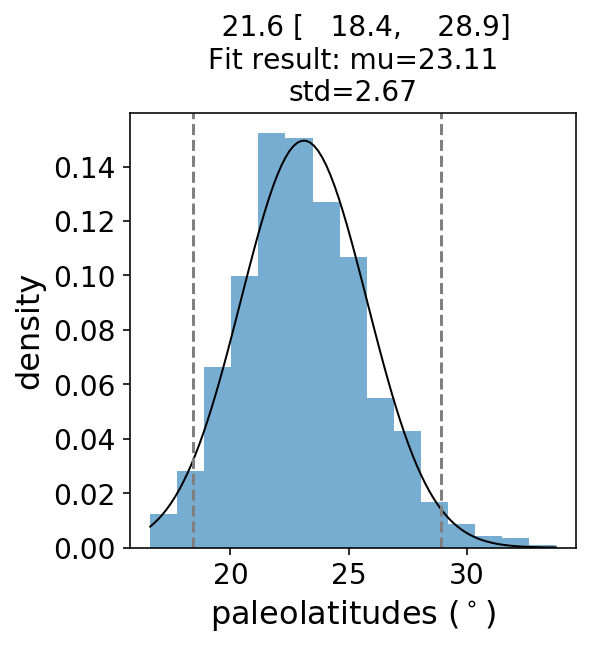

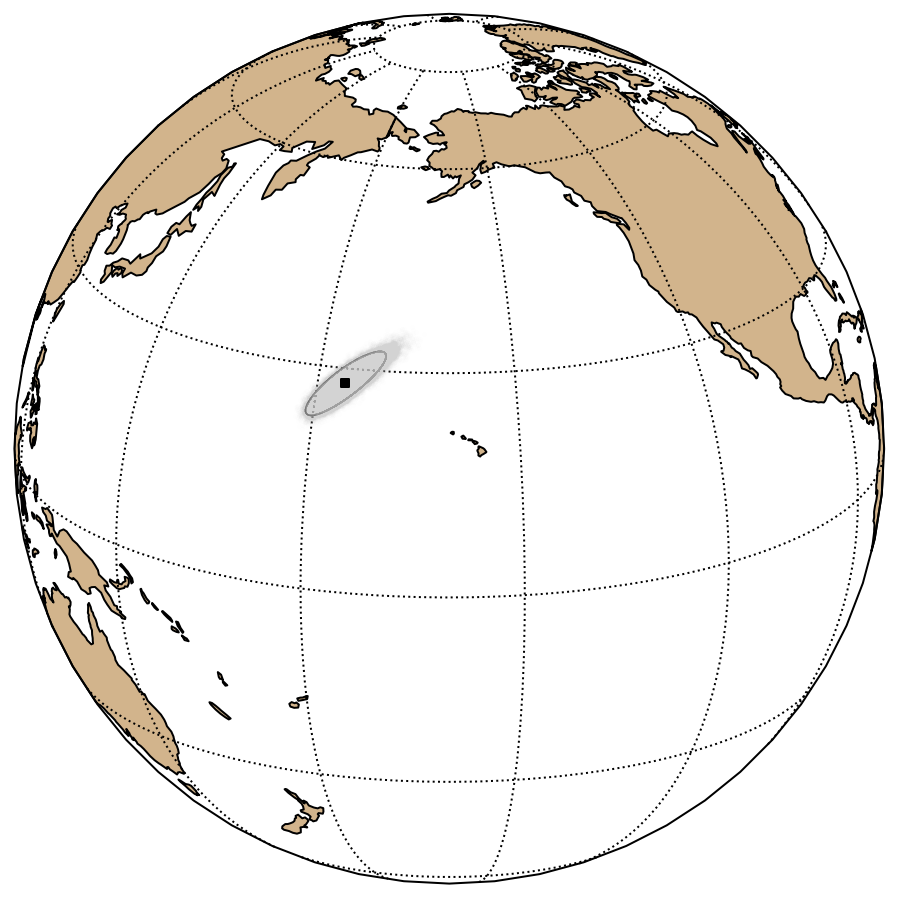

The original inclination was: 29.43

The corrected inclination is: 40.74
with bootstrapped confidence bounds of: 33.69 to 47.89
and elongation parameter of: 1.93
The flattening factor is: 0.64
with bootstrapped confidence bounds of: 0.85 to 0.51

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 184.3  Plat: 28.0
Major axis lon: 297.8  Major axis lat: 36.9
Minor axis lon: 67.4  Minor axis lat: 40.3
Major axis angle of 95% ellipse (Zeta): 6.6
Minor axis angle of 95% ellipse (Eta): 1.8
Number of directions in mean (n): 100000


{'dec': 184.2649428022192,
 'inc': 28.03161303981389,
 'n': 100000,
 'Zdec': 297.80337594220873,
 'Zinc': 36.87341653020405,
 'Edec': 67.37922678303073,
 'Einc': 40.34313781061393,
 'Zeta': 6.587051857590493,
 'Eta': 1.8309125345834278}

In [95]:
ipmag.find_ei_kent(np.array(ht_tc_di_block), Cutface_lat,Cutface_lon, nb=1000, central_longitude=200, central_latitude=20)